## Задача машинного обучения
Основная задача — восстанавление некотрой зависимости по исходных данных

### Примеры задач
- классифцикация объетов на несколько классов, например, кредитный скоринг
- предсказание определенного показателя, например, прогноз температуры
- компьютерное зрение: автоматическая обработка изображений
<table>
    <tr>
        <td>
            <img src="../../data/segment_example/nsu_example.jpg" width=400 />
        </td>
        <td>
            <img src="../../data/segment_example/segmented.png" width=400 />
        </td>
    </tr>
</table>

    - [Новосибирский государственный университет](https://www.nsu.ru/n/)
    - [Segment anything](https://segment-anything.com/demo#)

- обработка текстов
- обработка звука
- поиск
- предсказание свойств молекул
    - [DeepMind AplhaFold](https://www.deepmind.com/research/highlighted-research/alphafold) предсказывает геометрическую структуру молекул белков
    
    
### Типы задач по доступности данных
- с учителем (supervised learning)
- без учителя (unsupervised learning)
- с подкреплением (reinforcement learning)
- активное обучение (active learning)
- онлайн-обучение (online learning)


### Типы задач по свойствам целевого объекта
- классификация
- регрессия
- ранжирование
- ...

## Типы данных
- числовые
- категориальные
    - могут быть как упорядочены, так и нет
- текстовые
- изображения
- звук
- графы

### Контроль качества моделей
- Отложенная выборка
- кросс-валидация
- Leave one out

## Предобработка данных
Сложный этап. Часто требуется разработка метода под каждую задачу.

#### Выброс
Часто определить является ли конкретный объект выбросом или нет, сложно. Есть попытки разработать универсальные алгоритмы определения выбросов, например, на основе [машины опорных векторов](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM).


#### Пропуски в данных
Некоторые модели могут обрабабывать данные с пропусками, некоторые — нет
Стратегии обработки:
- удалить признак
- удалить пример
- заполнить пропуск:
    - среднее значение
    - мода
    - медиана
    - специальное значение
    - обучить другую модель и заполнить с помощью нее
    
    
#### Масштабирование данных
- Приведение данных в фиксированный диапазон

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

x = 100 * np.random.poisson(lam=2, size=(15, 4)) + 3
print(x)
print('Mean', x.mean(axis=0))
print('Std', x.std(axis=0))

scaler = MinMaxScaler()
scaler.fit(x)

transformed = scaler.transform(x)
print(transformed)
print('Mean', transformed.mean(axis=0))
print('Std', transformed.std(axis=0))

[[203 303 103 103]
 [403 203 103 203]
 [303 203   3 203]
 [203 203   3 203]
 [103   3 603   3]
 [303 303 203 403]
 [103 403 603 103]
 [  3   3 303   3]
 [  3 203 403   3]
 [203 103   3 103]
 [203 103 303 203]
 [103 403 103 203]
 [103 103 303 303]
 [403 103 303 103]
 [403   3 103   3]]
Mean [203.         176.33333333 229.66666667 143.        ]
Std [131.65611772 128.92719737 191.36933459 114.30952133]
[[0.5        0.75       0.16666667 0.25      ]
 [1.         0.5        0.16666667 0.5       ]
 [0.75       0.5        0.         0.5       ]
 [0.5        0.5        0.         0.5       ]
 [0.25       0.         1.         0.        ]
 [0.75       0.75       0.33333333 1.        ]
 [0.25       1.         1.         0.25      ]
 [0.         0.         0.5        0.        ]
 [0.         0.5        0.66666667 0.        ]
 [0.5        0.25       0.         0.25      ]
 [0.5        0.25       0.5        0.5       ]
 [0.25       1.         0.16666667 0.5       ]
 [0.25       0.25       0.5      

- Нормазилация

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

x = 100 * np.random.poisson(lam=2, size=(15, 4)) + 3
print(x)
print('Mean', x.mean(axis=0))
print('Std', x.std(axis=0))

scaler = StandardScaler()
scaler.fit(x)

transformed = scaler.transform(x)
print(transformed)
print('Mean', transformed.mean(axis=0))
print('Std', transformed.std(axis=0))

[[  3   3 103 303]
 [303 103 103 403]
 [103   3 203 103]
 [203 503 603 303]
 [103 103 103 203]
 [203 103 303 203]
 [303 303 203   3]
 [103 103 203 303]
 [  3 203 403 203]
 [203 303   3 403]
 [103 103 403 203]
 [203   3 203 503]
 [403 103 103   3]
 [203 203 403 203]
 [103 203 203 403]]
Mean [169.66666667 156.33333333 236.33333333 249.66666667]
Std [107.49676998 130.97921803 153.47819244 140.79141388]
[[-1.55043418 -1.17066918 -0.86874449  0.37881098]
 [ 1.24034735 -0.40718928 -0.86874449  1.08908156]
 [-0.62017367 -1.17066918 -0.21718612 -1.04173019]
 [ 0.31008684  2.64673031  2.38904734  0.37881098]
 [-0.62017367 -0.40718928 -0.86874449 -0.33145961]
 [ 0.31008684 -0.40718928  0.43437224 -0.33145961]
 [ 1.24034735  1.11977052 -0.21718612 -1.75200078]
 [-0.62017367 -0.40718928 -0.21718612  0.37881098]
 [-1.55043418  0.35629062  1.08593061 -0.33145961]
 [ 0.31008684  1.11977052 -1.52030285  1.08908156]
 [-0.62017367 -0.40718928  1.08593061 -0.33145961]
 [ 0.31008684 -1.17066918 -0.2171861

* Преобразование Бокса-Кокса

$$
    BoxCox(y, \lambda) = \begin{cases}
        \dfrac{y^\lambda -1}{\lambda}, & \lambda \neq 0 \\
        \ln y, & \lambda = 0
    \end{cases}
$$

In [3]:
import numpy as np

def box_cox(lambda_, y):
    if lambda_ == 0:
        return np.log(y)
    
    return (np.power(y, lambda_) - 1) / lambda_

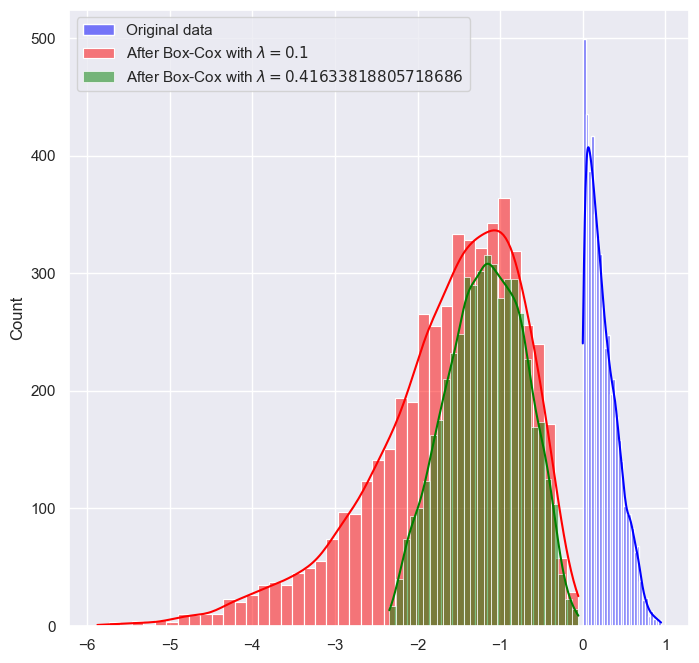

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline

sns.set()

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
data = np.random.beta(1, 3, 5000)
sns.histplot(data, kde=True, label='Original data', ax=ax, color='blue')

lambda_ = 0.1
box_cox_1 = box_cox(lambda_, data)
sns.histplot(box_cox_1, kde=True, label=f'After Box-Cox with $\lambda={lambda_}$', color='red', ax=ax)

transformed, optimal_lambda = scipy.stats.boxcox(data)
sns.histplot(transformed, kde=True, label=f'After Box-Cox with $\lambda={optimal_lambda}$', color='green', ax=ax)


plt.legend()

### Категориальные признаки
- Каждому значению приписываем числовое значени

In [5]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data = pd.Series(['BMW', 'Volvo', 'Mercedes', 'BMW'])
reshaped = data.values.reshape(-1, 1)
encoder = OrdinalEncoder().fit(reshaped)

encoder.transform(reshaped)

array([[0.],
       [2.],
       [1.],
       [0.]])

- OneHotEncoding

Каждый признак преобразуется в вектор длины, равной числу категорий.
У примера на $i$-ом месте стоит 1 тогда и только тогда, когда признак принмает значение $i$-ой категории

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = pd.Series(['BMW', 'Volvo', 'Mercedes', 'BMW'])
reshaped = data.values.reshape(-1, 1)
encoder = OneHotEncoder().fit(reshaped)

result = encoder.transform(reshaped)
print(type(result))
print(result.todense())

<class 'scipy.sparse._csr.csr_matrix'>
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


* TargetEncoding

Давайте положим какую-нибудь статистику по целевой переменной, например, среднее значние для задачи регрессии или долю объектов положительного класса для задачи классификации

**Важно**: поскольку мы добавляем в обучающие данные информацию о целевой переменной, это может приводить к утечке данных.
Нужно быть аккуратным, чтобы избежать вырождения задачи

In [28]:
import pandas as pd
from sklearn.preprocessing import TargetEncoder

n = 1000

target_probs = {
    'BMW': 0.7,
    'Volvo': 0.3,
    'Mercedes': 0.2,
}

auto = pd.Series(np.random.choice(list(target_probs.keys()), n))
y = (np.random.rand(n) < auto.replace(target_probs)).astype('int')

data = pd.DataFrame({
    'auto': auto,
    'y': y,
})
    
print(y.mean())
data.head(n=100)

0.405


,auto,y
0,Mercedes,0
1,BMW,0
2,BMW,1
3,BMW,1
4,BMW,1
...,...,...
95,BMW,1
96,Mercedes,0
97,BMW,1
98,Volvo,0


In [48]:
data.groupby('auto')['y'].mean()

auto
BMW         0.726225
Mercedes    0.189759
Volvo       0.280374
Name: y, dtype: float64

In [46]:
target_encoder = TargetEncoder(cv=10, target_type='binary')
target_encoder.fit(data[['auto']], data['y'])

data.loc[:, 'encoded_auto'] = target_encoder.transform(data[['auto']])
data.head()

,auto,y,encoded_auto
0,Mercedes,0,0.190172
1,BMW,0,0.725463
2,BMW,1,0.725463
3,BMW,1,0.725463
4,BMW,1,0.725463
